## 04 - Introduction to Frequency Analysis





---
We are going to introduce how to analyse signals $f(x)$ and images $f(x,y)$ with respect to the intensity oscilation/variation along the variables $x$ and/or $y$ in terms of **frequencies** defined by mathematical functions.

In [1]:
import numpy as np
import imageio
import matplotlib.pyplot as plt

*Repeated* patterns of variation, is related to **periodicity**

Simple mathematical functions that has this property are:
* **sine** and **cosine**.

*Sinusoudal functions* at
* **low** frequencies present slow or smooth variation, 
* **high frequency**  present fast oscilations. 

Let us create a sine function evaluated in the interval of time between 0 and 1, with step 0.001.

First we create the variable responsible to define the sampling along the time axis.

In [2]:
t = np.arange(0, 1, 0.001)
print("Number of observations: ", t.shape[0])

Number of observations:  1000


This means we are going to sample 1000 points "per second".

Now, we create a sine that is periodic with period $2\pi$ along $t$

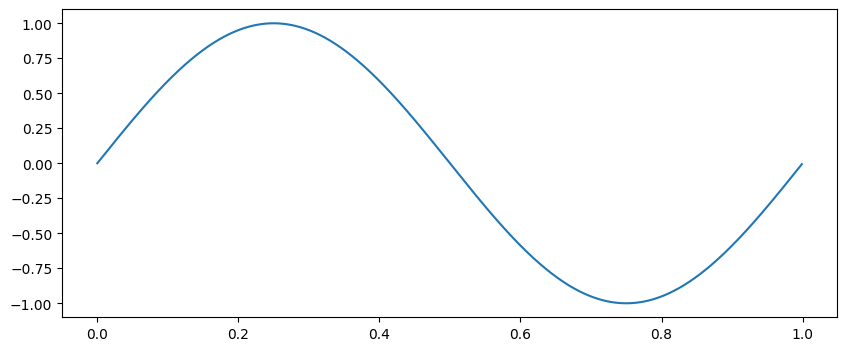

In [3]:
mysine = np.sin( 2*np.pi* t )
plt.figure(figsize=(10,4))
plt.plot(t, mysine)


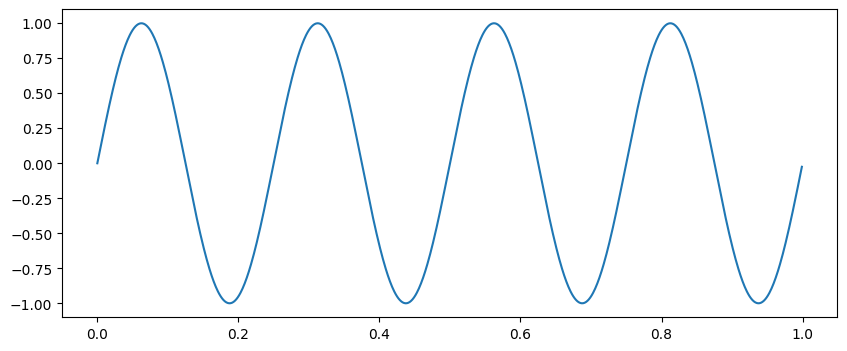

In [4]:
# increasing frequency to 4 Hz
mysine4 = np.sin(2*np.pi*t * 4)
plt.figure(figsize=(10,4))
plt.plot(t, mysine4)

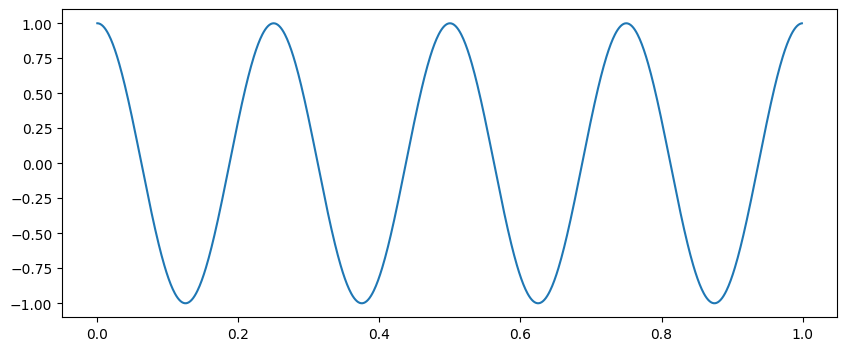

In [5]:
# changing to cosine at 4 Hz
mycos4 = np.cos(2*np.pi*t*4)
plt.figure(figsize=(10,4))
plt.plot(t, mycos4)

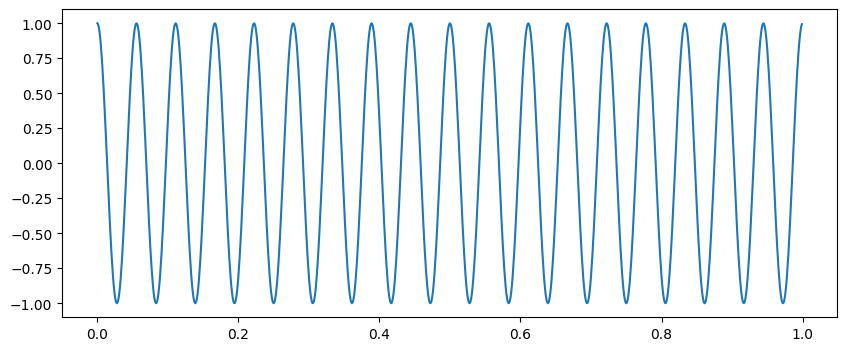

In [6]:
# increasing frequency to 18
mycos18 = np.cos(2*np.pi*t*18)
plt.figure(figsize=(10,4))
plt.plot(t, mycos18)

In [7]:
# combining all four functions:
myfun = mysine + mysine4 + mycos4 + mycos18

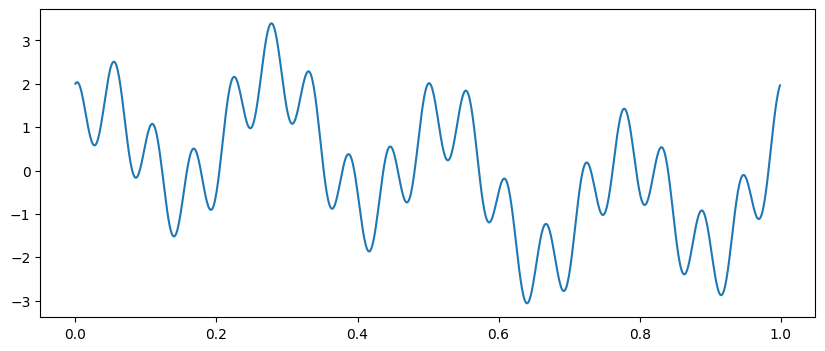

In [8]:
plt.figure(figsize=(10,4))
plt.plot(t, myfun)

We know the function has:
* sines in frequencies 1 and 4
* cosines in frequencies 4 and 18

Now let us match the function with sines and cosines in frequencies 3 Hz (not part of signal) and 4 Hz (part of signal)

In [9]:
Omega = 4 # frequency
match_sin_4 = myfun * np.sin(Omega*(2*np.pi)*t)
match_cos_4 = myfun * np.cos(Omega*(2*np.pi)*t)
print("Sum of matching sines at 4Hz = %.2f" % np.sum(match_sin_4))
print("Sum of matching cosines at 4Hz = %.2f" % np.sum(match_cos_4))

Sum of matching sines at 4Hz = 500.00
Sum of matching cosines at 4Hz = 500.00


In [10]:
Omega = 3
match_sin_3 = myfun * np.sin(Omega*(2*np.pi)*t)
match_cos_3 = myfun * np.cos(Omega*(2*np.pi)*t)
print("Sum of matching sines at 3 = %.4f" % np.sum(match_sin_3))
print("Sum of matching cosines at 3 = %.4f" % np.sum(match_cos_3))

Sum of matching sines at 3 = -0.0000
Sum of matching cosines at 3 = -0.0000


This procedure was able to *detect that our function nas 4 Hz patterns* while the 3 Hz is absent!

Let us plot the point-wise multiplication to see this effect:

Text(0.5, 1.0, 'Matching sin at 3Hz')

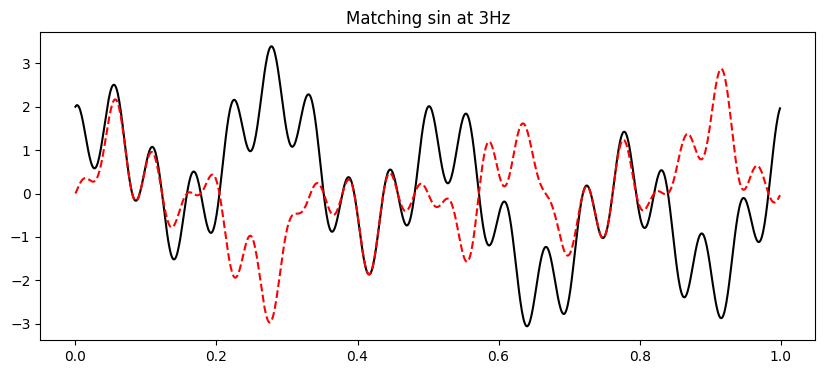

In [11]:
plt.figure(figsize=(10,4))
plt.plot(t, myfun, '-k')
plt.plot(t, match_sin_3, '--r')
plt.title('Matching sin at 3Hz')

Text(0.5, 1.0, 'Matching sin at 4Hz')

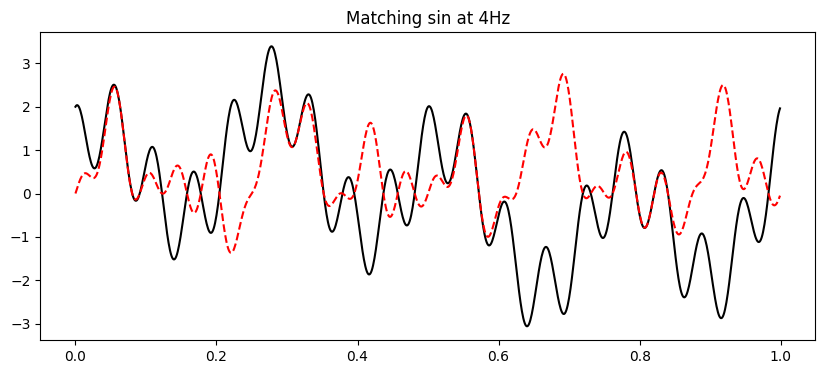

In [12]:
plt.figure(figsize=(10,4))
plt.plot(t, myfun, 'k')
plt.plot(t, match_sin_4, '--r')
plt.title('Matching sin at 4Hz')

We can code a function to measure that for many frequencies!

In [13]:
def match_freqs(f, t, maxfreq):
    
    print("Coefficients of sine and cosine matching")
    print("Omega\tSine\tCosine")
    
    for Omega in np.arange(0, maxfreq):
        match_sin = np.sum(f * np.sin(Omega*2*np.pi*t))
        match_cos = np.sum(f * np.cos(Omega*2*np.pi*t))
        print("%d\t%.1f\t%.1f" % (Omega, match_sin, match_cos))
        

In [14]:
match_freqs(myfun, t, 22)

Coefficients of sine and cosine matching
Omega	Sine	Cosine
0	0.0	-0.0
1	500.0	0.0
2	-0.0	-0.0
3	-0.0	-0.0
4	500.0	500.0
5	0.0	-0.0
6	-0.0	-0.0
7	0.0	-0.0
8	0.0	0.0
9	-0.0	-0.0
10	-0.0	-0.0
11	0.0	0.0
12	0.0	-0.0
13	-0.0	-0.0
14	0.0	-0.0
15	0.0	0.0
16	-0.0	-0.0
17	0.0	-0.0
18	0.0	500.0
19	-0.0	-0.0
20	-0.0	-0.0
21	0.0	-0.0


### Frequency Analysis and Images

A way to interpret signal and image characteristics is via **frequencies** in which *lower* frequencies are related to smooth transitions, while *higher* frequencies are related to abrupt changes along $x$ or $x,y$.

The **Fourier Transform** is a method to *describe* signals in terms of the frequency content. But before delving into this method, let us first motivate and give the rationale behind the description of signals in frequencies.


In [15]:
img1 = imageio.imread("images/gradient_noise.png")
img2 = imageio.imread("images/pattern.png")
img3 = imageio.imread("images/sin1.png")

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  """Entry point for launching an IPython kernel.
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-

Those three images contain different variation of intensities

(-0.5, 511.5, 511.5, -0.5)

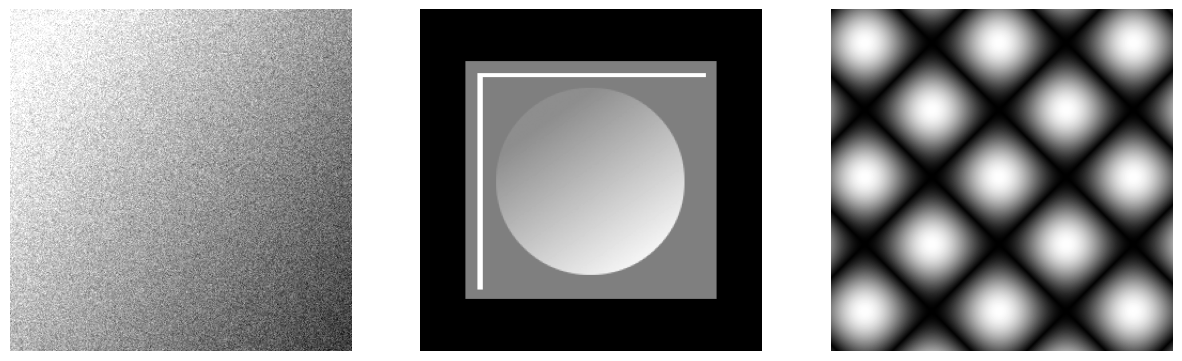

In [16]:
plt.figure(figsize=(15,5)) 
plt.subplot(131)
plt.imshow(img1, cmap="gray")
plt.axis('off')
plt.subplot(132)
plt.imshow(img2, cmap="gray")
plt.axis('off')
plt.subplot(133)
plt.imshow(img3, cmap="gray")
plt.axis('off')

The first is a ramp of intensities with noise. 

Pixels have a high degree of local variation. 

Let us plot the image and show the values relative to a small region of pixels. Note how each pixel is different in each neighbour region.

(-0.5, 319.5, 319.5, -0.5)

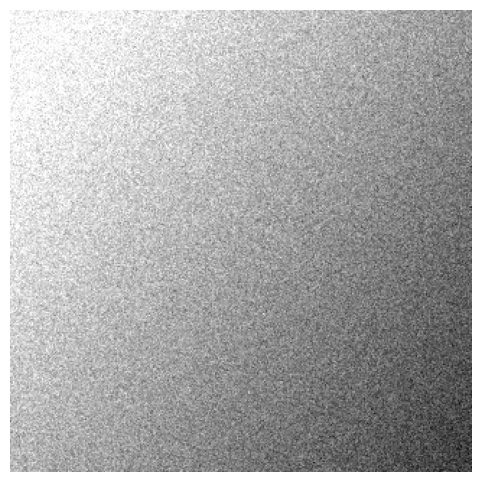

In [17]:
plt.figure(figsize=(6,6)) 
plt.imshow(img1, cmap="gray")
plt.axis('off')

Let us visualise a subimage:

In [18]:
print(img1[200:210, 200:210])

[[159 119 110 154 144 134 147 121 157 135]
 [170 171 151 154 152 141 141 126 131 160]
 [150 163 133 147 153 130 133 148 158 145]
 [153 136 128 134 114 141 136 151 136 128]
 [139 137 115 130 136 145 137 118 171 151]
 [166 130 120 197 146 151 130 146 132 191]
 [128 137 130 109 130 167 162 151 120 153]
 [156 140 134 120 147 154 142 120 135 130]
 [136 141 141 106 122 141 128 120 170 108]
 [144 157 178 129 131 146 130 135 136 140]]


Doing the same with other images.

The other images include flat regions: indicating no local variation, and with more smooth transitions

[[127 127 127 127 127 127 127 127 127 127]
 [127 127 127 127 127 127 127 127 127 127]
 [127 127 127 127 127 127 127 127 127 127]
 [127 127 127 127 127 127 127 127 127 127]
 [127 127 127 127 127 127 127 127 127 127]
 [127 127 127 127 127 127 127 127 127 127]
 [127 127 127 127 127 127 127 127 127 127]
 [127 127 127 127 127 127 127 127 127 127]
 [127 127 127 127 127 127 127 127 127 127]
 [127 127 127 127 127 127 127 127 127 127]]


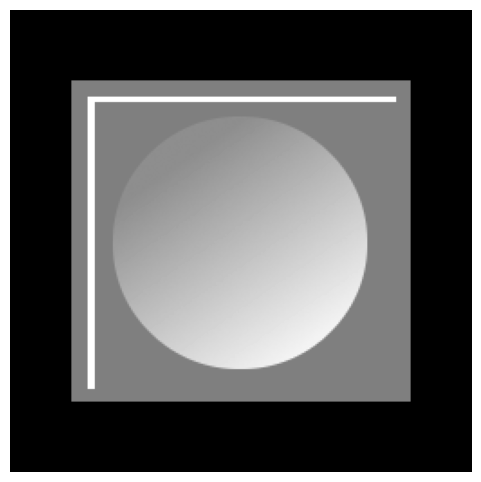

In [19]:
plt.figure(figsize=(6,6)) 
plt.imshow(img2, cmap="gray"); plt.axis('off')
print(img2[200:210, 200:210])

[[ 8  4  3  7 11 15 19 23 27 30]
 [ 4  3  7 11 15 19 23 27 31 34]
 [ 3  7 11 15 19 23 27 31 35 38]
 [ 7 11 15 19 23 27 31 35 39 42]
 [11 15 19 23 27 31 35 39 43 46]
 [15 19 23 27 31 35 39 43 46 50]
 [19 23 27 31 35 39 43 47 50 54]
 [23 27 31 35 39 43 47 50 54 58]
 [27 31 35 39 43 46 50 54 58 62]
 [30 34 38 42 46 50 54 58 62 66]]


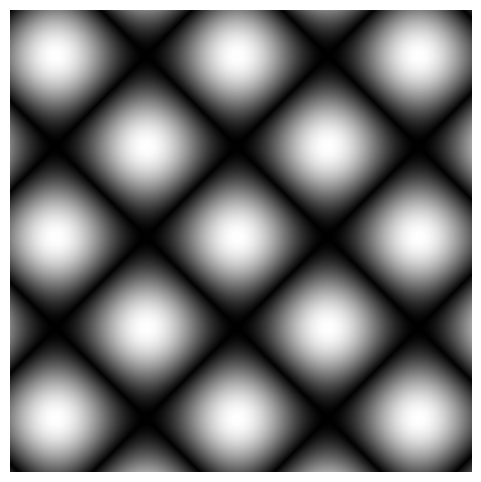

In [20]:
plt.figure(figsize=(6,6)) 
plt.imshow(img3, cmap="gray")
plt.axis('off')

print(img3[200:210, 200:210])

Intuitively, we would like to have a method that allows discriminating information related to smooth, slower, transitions from those related to faster oscilation of intensities.

Let us simplify the analysis with a 1D vector containing 128 elements by fixing the coordinate $x=100$ and varying $y$, as follows.

[118 116 114 112 110 108 106 103 101  98  96  93  90  87  84  81]


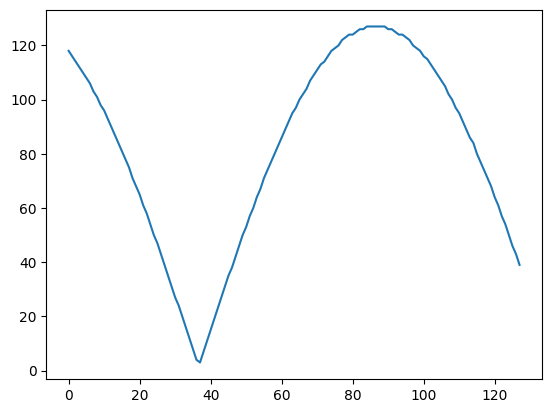

In [21]:
# x = 100
# y varies between 64 and 191
vec3 = img3[100, 64:192]
print(vec3[:16])
plt.plot(vec3)

By inspecting such plot, what can you infer about the transition of the intensities? Is it abrupt/fast or slower/smooth?

Now let us obtain an array of similar size, but from the noisy image, and observe its transition patterns

[127 127 127 127 127 127 127 127 127 127 127 127 127 127 127 127]


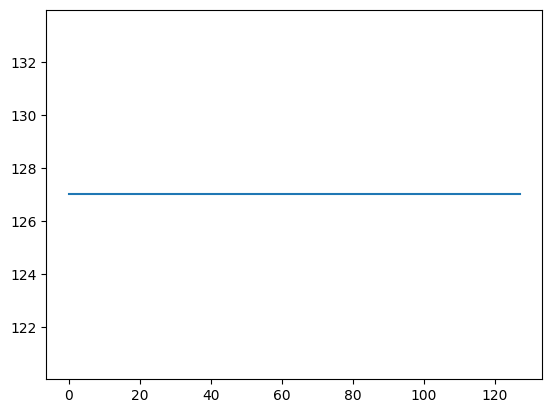

In [22]:
vec2 = img2[200, 64:192]
print(vec2[:16])
plt.plot(vec2)

[224 208 213 196 255 210 210 232 235 212 191 210 220 197 184 214]


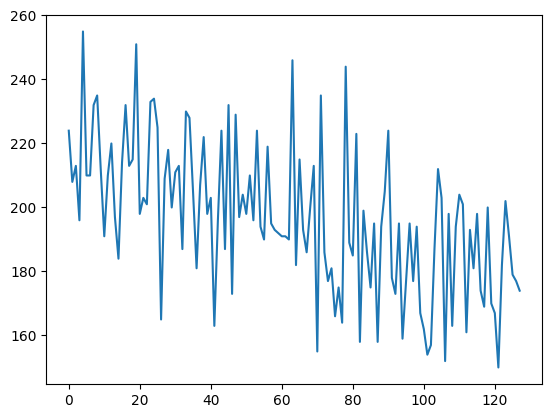

In [23]:
vec1 = img1[100, 64:192]
print(vec1[:16])
plt.plot(vec1)

---
By analysing how the pixels change along coordinates, we describe the image using **frequencies** which allows:
* a new representation
* a tool for image processing